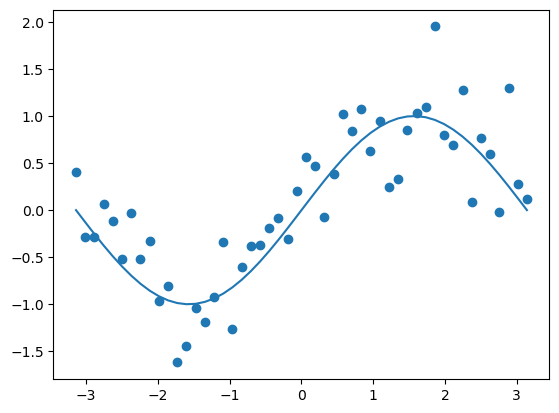

In [2]:
# 7.1.5 
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi)
T = np.sin(X) # 데이터
plt.plot(X, T) # 노이즈 추가 전

T += 0.4*np.random.randn(len(X)) # 정규분포를 따르는 노이즈 추가
plt.scatter(X, T)# 노이즈 추가 후

plt.show()

X /= np.pi # 수렴하기 쉽게 X의 범위를 -1부터 1사이로 수렴한다

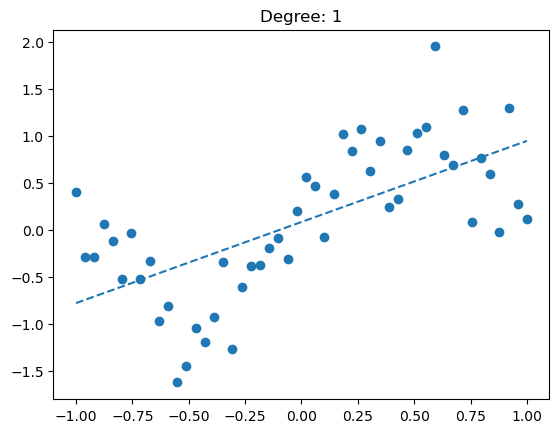

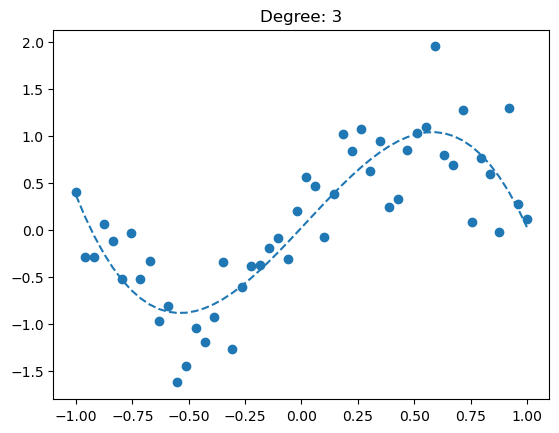

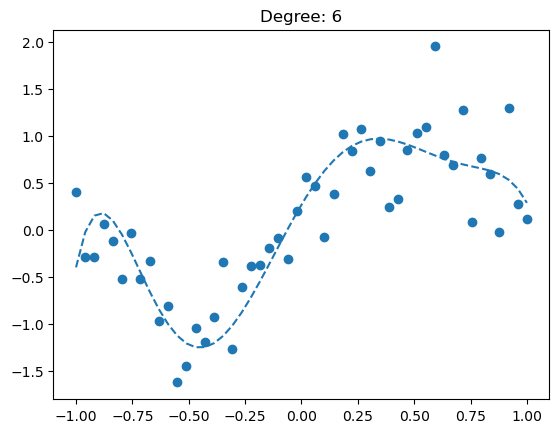

In [4]:
# 7.1.6 다항식 회귀의 구현

eta = 0.01 # 학습계수

# --- 다항식 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i # 식 1
    return poly

# --- 각 파라미터의 기울기 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):
        for j in range(len(X)):
            grad_ps[i] += (polynomial(X[j], params) - T[j])*X[j]**i # 식 7
    return grad_ps

# --- 학습 ---
def fit(X, T, degree, epoch): # degree: 다항식의 차수 epoch: 반복하는 회수
    
    # --- 파라미터 초깃값을 설정 ---    
    params = np.random.randn(degree+1) # 파라미터의 초깃값
    for i in range(len(params)):
        params[i] *= 2**i
        # 고차의 항일수록 파라미터를 크게
        
    # --- 파라미터의 갱신 ---
    for i in range(epoch):
        params -= eta * grad_params(X, T, params) # 식 4
        
    return params

# --- 결과표시 ---
degrees = [1, 3, 6] # 다항식의 차수
for degree in degrees:
    txt = "Degree: " + str(degree)
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params) # 학습 후의 파라미터를 사용한 다항식
    plt.title(txt)
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle="dashed")
    
    plt.show()

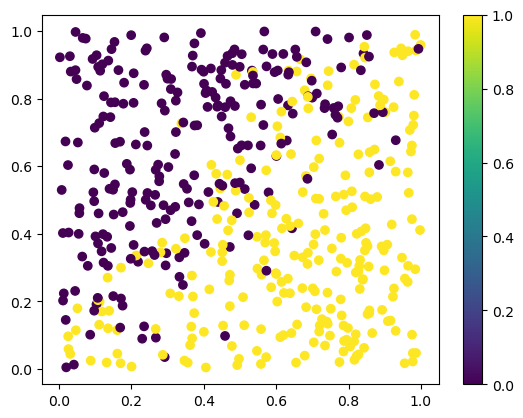

In [15]:
# 분류와 로지스틱 회귀

n_data = 500 # 데이터 수
X = np.zeros((n_data, 2)) # 입력
T = np.zeros((n_data)) # 정답

for i in range(n_data):
    # x, y 좌표를 랜덤으로 설정
    x_rand = np.random.rand()
    y_rand = np.random.rand()
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    # x가 y보다 큰 영역에서는 정답 라벨을 1로한다
    # 경계는 정규분포를 사용해서 조금 불명료하게
    if x_rand > y_rand+ 0.2*np.random.randn():
        T[i] = 1

plt.scatter(X[:, 0], X[:,1], c = T) # 정답 라벨을 색으로 나타낸다
plt.colorbar()
plt.show()

--- 확률 분포 ---


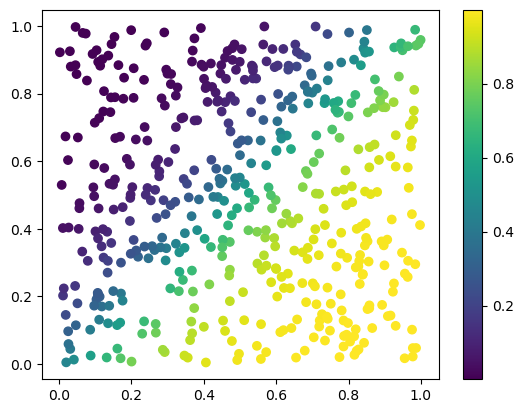

--- 오차의 추이 ---


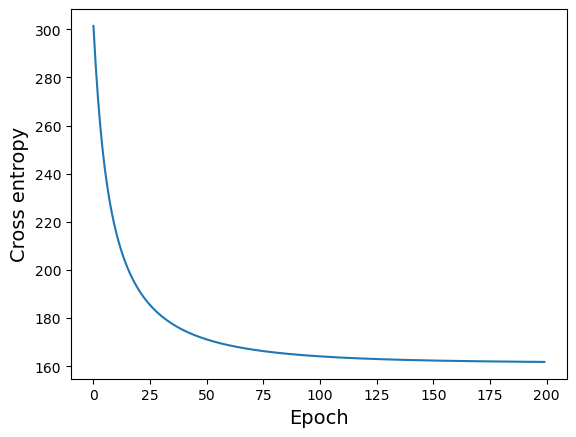

In [16]:
# 7.2.5 로지스틱 회귀의 구현

eta = 0.01

# --- 출력을 계산(분류를 시행) ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param # 식 4
    return 1/(1+np.exp(-u)) # 식 4

# --- 교차 엔트로피 오차 ---
def cross_entropy(Y, T):
    delta = 1e-7 # 미소한 값
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta)) # 식 3

# --- 각 파라미터의 기울기 ---
def grad_a_params(X, T, a_params, b_param): # a1, a2, ... 의 기울기
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):
        for j in range(len(X)):
            grad_a[i] += (classify(X[j], a_params, b_param) - T[j]) * X[j, i] # 식 7
    return grad_a

def grad_b_param(X, T, a_params, b_param): # b 의 기울기
    grad_b = 0
    for i in range(len(X)):
        grad_b += (classify(X[i], a_params, b_param) - T[i]) # 식 8
    return grad_b

# --- 학습 ---
error_x = [] # 오차 기록용
error_y = []
def fit(X, T, dim, epoch): # dim: 입력의 차원 epoch: 반복 횟수
    
    # --- 파라미터 초깃값 설정
    a_params = np.random.randn(dim)
    b_param = np.random.randn()
    
    # --- 파라미터 갱신 ---
    for i in range(epoch):
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a # 식 2
        b_param -= eta * grad_b # 식 2
        
        Y = classify(X, a_params, b_param)
        error_x.append(i) # 오차 기록
        error_y.append(cross_entropy(Y,T))
        
    return (a_params, b_param)

# --- 확률분포의 표시 ---
a_params, b_param = fit(X, T, 2, 200) # 학습
Y = classify(X, a_params, b_param) # 학습 후의 파라미터를 사용한 분류

result_x = []
result_y = []
result_z = [] # 확률
for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])
    
print("--- 확률 분포 ---")
plt.scatter(result_x, result_y, c = result_z) # 확률을 색으로 표시
plt.colorbar()
plt.show()

# --- 오차의 추이 ---
print("--- 오차의 추이 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size=14)
plt.ylabel("Cross entropy", size=14)
plt.show()

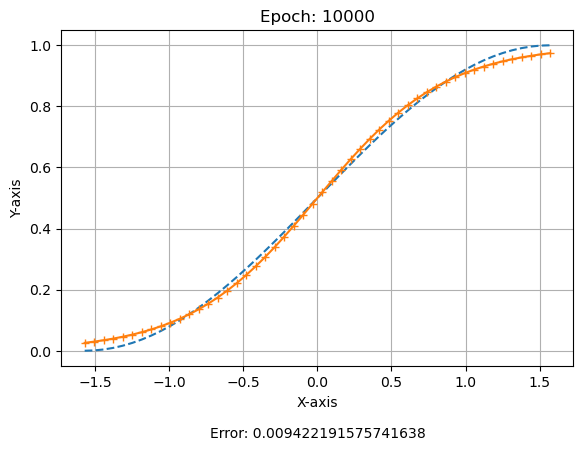

In [36]:
# 뉴럴 네트워크 단일 뉴런의 학습
# -- 입력과 정답의 준비 --
X = np.linspace(-np.pi/2, np.pi/2) # 입력: -pi/2 부터 pi/2의 범위
T = (np.sin(X) + 1)/2 # 정답: 0부터 1의 범위
n_data = len(T)

# --- 순전파 ---
def forward(x, w, b):
    u = x*w + b
    y = 1/(1+np.exp(-u))
    return y

# --- 역전파 ---
def backward(x, y, t):
    delta = (y-t)*(1-y)*y
    grad_w = x * delta # 가중치의 기울기
    grad_b = delta # 바이어스의 기울기
    return (grad_w, grad_b)

# --- 정답을 그래프로 표시 ---
def show_output(X, Y, T, epoch):
    fig = plt.figure()    
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_title("Epoch: " + str(epoch))
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    plt.plot(X, T, linestyle="dashed") # 정답을 점선으로
    plt.plot(X, Y, marker="+") # 출력을 산포도로

    # 오차 제곱합을 표시
    txt = "Error: " + str(1/2*np.sum((Y-T)**2))
    fig.text(.5, .05, txt, ha="center")
        
    plt.grid()
    plt.show()
                                                
# --- 고정값 ---
eta = 0.1 # 학습계수
epoch = 10000 # 에포크 수

# --- 초깃값 ---
w = 0.2 # 가중치
b = -0.2 # 바이어스

# --- 학습 ---
for i in range(epoch):
        
    idx_rand = np.arange(n_data) # 0 부터 n_data-1 까지의 정수
    np.random.shuffle(idx_rand) # 섞는다
    
    for j in idx_rand: # 랜덤인 샘플
        x = X[j] # 입력
        t = T[j] # 정답
        
        y = forward(x, w, b) # 순전파
        grad_w, grad_b = backward(x, y, t) # 역전파
        w -= eta * grad_w # 가중치 갱신
        b -= eta * grad_b # 바이어스 갱신
        
# --- 마지막 결과 표시 ---
Y = forward(X, w, b)
show_output(X, Y, T, epoch)

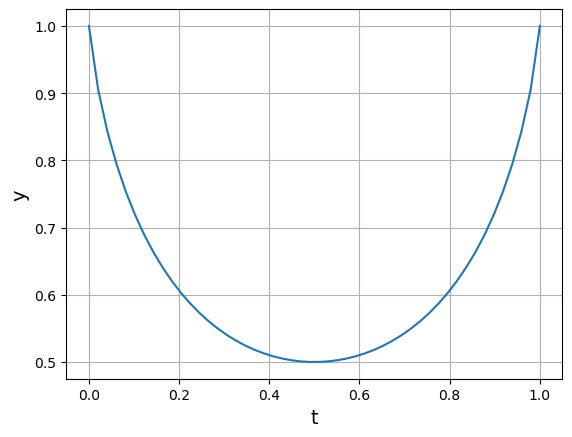

In [41]:
def cross_entropy(p, t):
    return p**t*(1-p)**(1-t)

p = np.linspace(0, 1)
t = np.linspace(0, 1)
y = cross_entropy(p, t)

plt.plot(t, y, label="cross entropy")
plt.xlabel("t", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()